# AQI of India

### Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

AQI India dataset taken from [Kaggle](https://www.kaggle.com/rohanrao/air-quality-data-in-india)
I am trying to figure out the city-wise data analysis of air pollution and it's pollutants.
### Here, I will use: 
##### 1 : Pandas for Data Preparation & Cleaning
##### 2 : Matplotlib and Seaborn for Exploratory Analysis & Visualization

From this course, I learned a lot about numpy, pandas and matplotlib. Thanks to this awesome course.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The source of this dataset will from Kaggle

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india?select=city_day.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akashdeepdam
Your Kaggle Key: ········


  5%|▌         | 4.00M/72.9M [00:00<00:01, 39.2MB/s]

100%|██████████| 72.9M/72.9M [00:01<00:00, 76.0MB/s]


The dataset has been downloaded and extracted.

In [1]:
# Change this
data_dir = './air-quality-data-in-india'

In [2]:
import os
os.listdir(data_dir)

['city_day.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "zero-to-pandas-project" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

###  We will use city_day.csv in entire project to analyse the day-wise data in cities

#### We will use pandas to explore rows, columns and also will handle missing or invalid values, if any.



In [1]:
import pandas as pd

In [2]:
# Here, we using read_csv for read the .csv file

city_day_df = pd.read_csv('./air-quality-data-in-india/city_day.csv')
city_day_df = pd.DataFrame(city_day_df)

In [3]:
# Here is our table to show

city_day_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
# We have the following columns in dataset

city_day_df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
# Details info about our dataframe

city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
# Null value counts

city_day_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
# Here a function to make missing value table
def missing_value_table(df):
    values = df.isnull().sum()
    percentage = 100*df.isnull().sum()/len(df)
    table = pd.concat([values,percentage.round(2)],axis=1)
    table.columns = ['No of missing values','% of missing values']
    return table[table['No of missing values']!=0].sort_values('% of missing values',ascending=False).style.background_gradient('winter_r')
    
missing_value_table(city_day_df)

,No of missing values,% of missing values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [8]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
# A function to categorize the status of AQI_Bucket column and handle the missing value

def aqi_bucket_status(df):
    if df['AQI'] < 51.0:
        return 'Good'
    elif 50.0<df['AQI']<101.0:
        return 'Satisfactory'
    elif 100.0<df['AQI']<201.0:
        return 'Moderate'
    elif 200.0<df['AQI']<301.0:
        return 'Poor'
    elif 300.0<df['AQI']<401.0:
        return 'Very Poor'
    else:
        return 'Severe'

city_day_df['AQI_Bucket'] = city_day_df.apply(aqi_bucket_status, axis=1)

In [10]:
# See here null values of AQI_Bucket was removed by above function

city_day_df.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10801,Delhi,2016-07-26,54.50,95.08,11.64,40.48,50.72,48.60,1.08,8.20,52.30,2.91,10.16,NaN,163.0,Moderate
18458,Jorapokhar,2019-05-17,NaN,94.92,7.98,7.79,NaN,6.58,3.52,NaN,17.74,NaN,NaN,NaN,NaN,Severe
23329,Mumbai,2019-01-14,66.32,191.30,37.01,44.04,81.05,NaN,2.37,25.59,72.08,1.57,NaN,NaN,163.0,Moderate
20327,Lucknow,2016-04-26,99.92,NaN,5.89,49.62,4.22,NaN,3.74,5.51,75.72,1.10,0.96,NaN,240.0,Poor
13790,Gurugram,2019-09-17,58.53,124.72,6.18,7.66,13.37,NaN,1.77,10.49,38.11,2.01,6.04,NaN,112.0,Moderate
9234,Chennai,2018-11-01,27.63,NaN,13.25,17.66,30.91,99.75,1.09,7.29,13.71,0.37,1.48,NaN,83.0,Satisfactory
14541,Guwahati,2020-05-23,13.18,22.34,1.46,6.80,4.40,1.34,0.38,14.73,24.65,0.00,NaN,NaN,38.0,Good
23312,Mumbai,2018-12-28,69.88,152.97,56.22,52.64,108.22,NaN,2.03,26.15,37.61,1.48,NaN,NaN,130.0,Moderate
8079,Chennai,2015-09-03,26.54,NaN,9.27,17.24,19.25,23.58,1.99,18.24,28.04,NaN,NaN,NaN,99.0,Satisfactory
13433,Gurugram,2018-09-25,54.14,NaN,12.54,16.72,16.16,NaN,0.72,5.84,24.72,0.56,NaN,NaN,58.0,Satisfactory


In [11]:
import numpy as np

# Replace all NaN values by 0

city_day_not_null = city_day_df.replace(np.nan, 0)

In [12]:
# Here as random sample, we can see no null value present

city_day_not_null.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
15807,Hyderabad,2018-05-14,29.86,67.84,2.42,26.02,15.62,12.81,0.64,5.38,56.79,0.50,2.44,0.47,100.0,Satisfactory
3680,Amritsar,2018-10-27,48.55,138.69,31.37,26.26,58.63,15.68,0.00,5.78,25.03,10.51,2.57,11.77,124.0,Moderate
260,Ahmedabad,2015-09-18,36.33,0.00,7.68,12.88,20.56,0.00,7.68,8.28,43.35,0.00,4.29,0.36,195.0,Moderate
27529,Thiruvananthapuram,2019-01-09,65.74,104.01,2.58,6.56,5.59,6.99,0.03,23.45,76.67,0.00,0.00,0.00,137.0,Moderate
20909,Lucknow,2017-11-29,236.79,0.00,101.11,92.62,130.14,96.77,2.29,10.96,34.01,1.34,2.98,0.00,364.0,Very Poor
29325,Visakhapatnam,2019-12-09,12.79,48.71,6.63,30.60,21.67,6.12,0.91,9.02,42.00,3.15,7.48,1.61,63.0,Satisfactory
15595,Hyderabad,2017-10-14,33.32,60.37,10.84,25.10,3.74,12.38,0.10,2.46,63.15,0.17,1.48,0.00,123.0,Moderate
25462,Patna,2019-10-16,107.92,0.00,26.33,24.57,22.33,0.00,3.29,58.25,31.98,0.00,0.00,0.00,225.0,Poor
3631,Amritsar,2018-09-08,0.00,24.89,10.26,7.84,18.10,4.47,0.00,3.13,22.58,5.02,7.59,8.23,40.0,Good
23348,Mumbai,2019-02-02,50.63,184.82,0.00,0.00,0.00,0.00,2.27,17.97,59.69,1.88,0.00,0.00,152.0,Moderate


In [13]:
# Remember, we created a function missing_value_table, now we use that function to see still any null values exist or not

missing_value_table(city_day_not_null)

,No of missing values,% of missing values


### See above, here is no NaN value now. Perfect !!

In [40]:
import jovian

In [41]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashreveluv/zero-to-pandas-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/akashreveluv/zero-to-pandas-project


'https://jovian.ai/akashreveluv/zero-to-pandas-project'

## Exploratory Analysis and Visualization

#### We will use various plots or chart for better viewing experience and understanding the data

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Vizualization 1** - Here we will see which city is most polluted in 5 years span

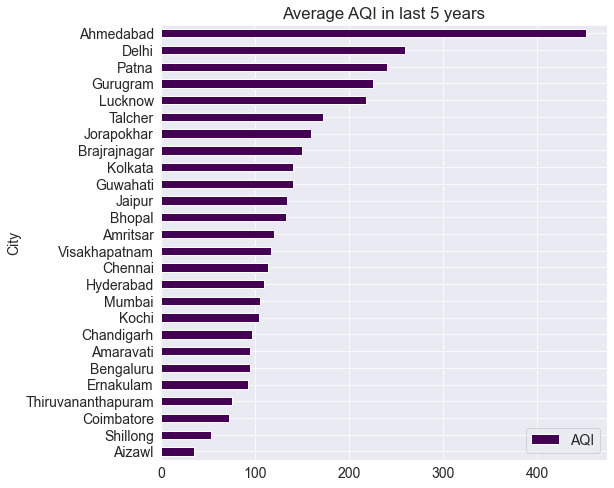

In [15]:
city_day_df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='barh',cmap='viridis',figsize=(8,8))
plt.title('Average AQI in last 5 years');

##### We can observe above that, top 5 most polluted cities in India are: Ahmedabad, Delhi, Lucknow, Gurugram & Patna

**Vizualization 2** - Here we will see correlation among pollutants and gases

In [16]:
# We take a copy of our real dataset into city_day variable

city_day = city_day_not_null.copy()

In [17]:
# We know as per chemistry, BTX = Benzene + Toluene + Xylene. So we make new column BTX and aggregate Benzene, Toluene & Xylene.

city_day['BTX'] = city_day_not_null['Benzene'] + city_day_not_null['Toluene'] + city_day_not_null['Xylene']

In [18]:
# Two types of Particulate Matter in dataset. We will aggregate those and make new column Particulate_Matter

city_day['Particulate_Matter'] = city_day_not_null['PM2.5'] + city_day_not_null['PM10']

In [19]:
# We know as per chemistry that, NO - NO2 - NOx are Nitrogen Oxides. 
# Here we will aggregate those and make new column Nitrogen Oxides.

city_day['Nitrogen Oxides'] = city_day_not_null['NO'] + city_day_not_null['NO2'] + city_day_not_null['NOx']

In [20]:
# We already make new columns as per our needs. So we will drop the below columns from copy dataframe, 
# which not affected real one.

city_day.drop(['Benzene','Toluene','Xylene','PM2.5','PM10','NO','NO2','NOx'],axis=1,inplace=True)

In [21]:
# Here we can see the 3 newly created columns

city_day.sample(5)

,City,Date,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter,Nitrogen Oxides
4079,Amritsar,2019-11-30,5.02,0.64,8.22,19.66,60.0,Satisfactory,6.76,111.48,39.27
856,Ahmedabad,2017-05-06,0.00,0.00,0.00,0.00,0.0,Severe,0.00,0.00,0.00
24439,Patna,2016-12-27,0.00,1.53,0.88,1.95,378.0,Very Poor,1.04,179.13,53.57
3674,Amritsar,2018-10-21,17.11,0.01,5.58,18.68,115.0,Moderate,27.22,185.93,94.40
6279,Bengaluru,2020-06-08,5.22,0.65,6.88,16.90,55.0,Satisfactory,3.39,69.01,35.38


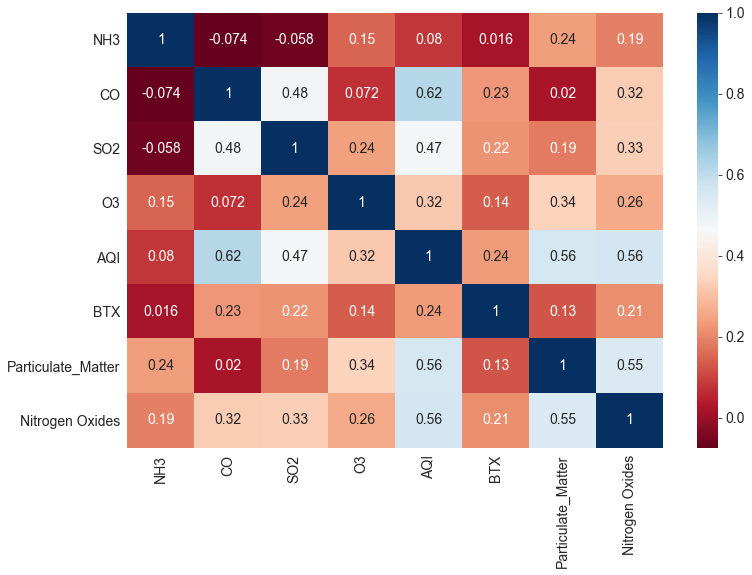

In [22]:
# Here is heatmap to show the correlation

plt.figure(figsize=(12,8))
sns.heatmap(city_day.corr(),cmap='RdBu',annot=True);

**Vizualization 3** - Here we will see various gases and pollutants distribution in air

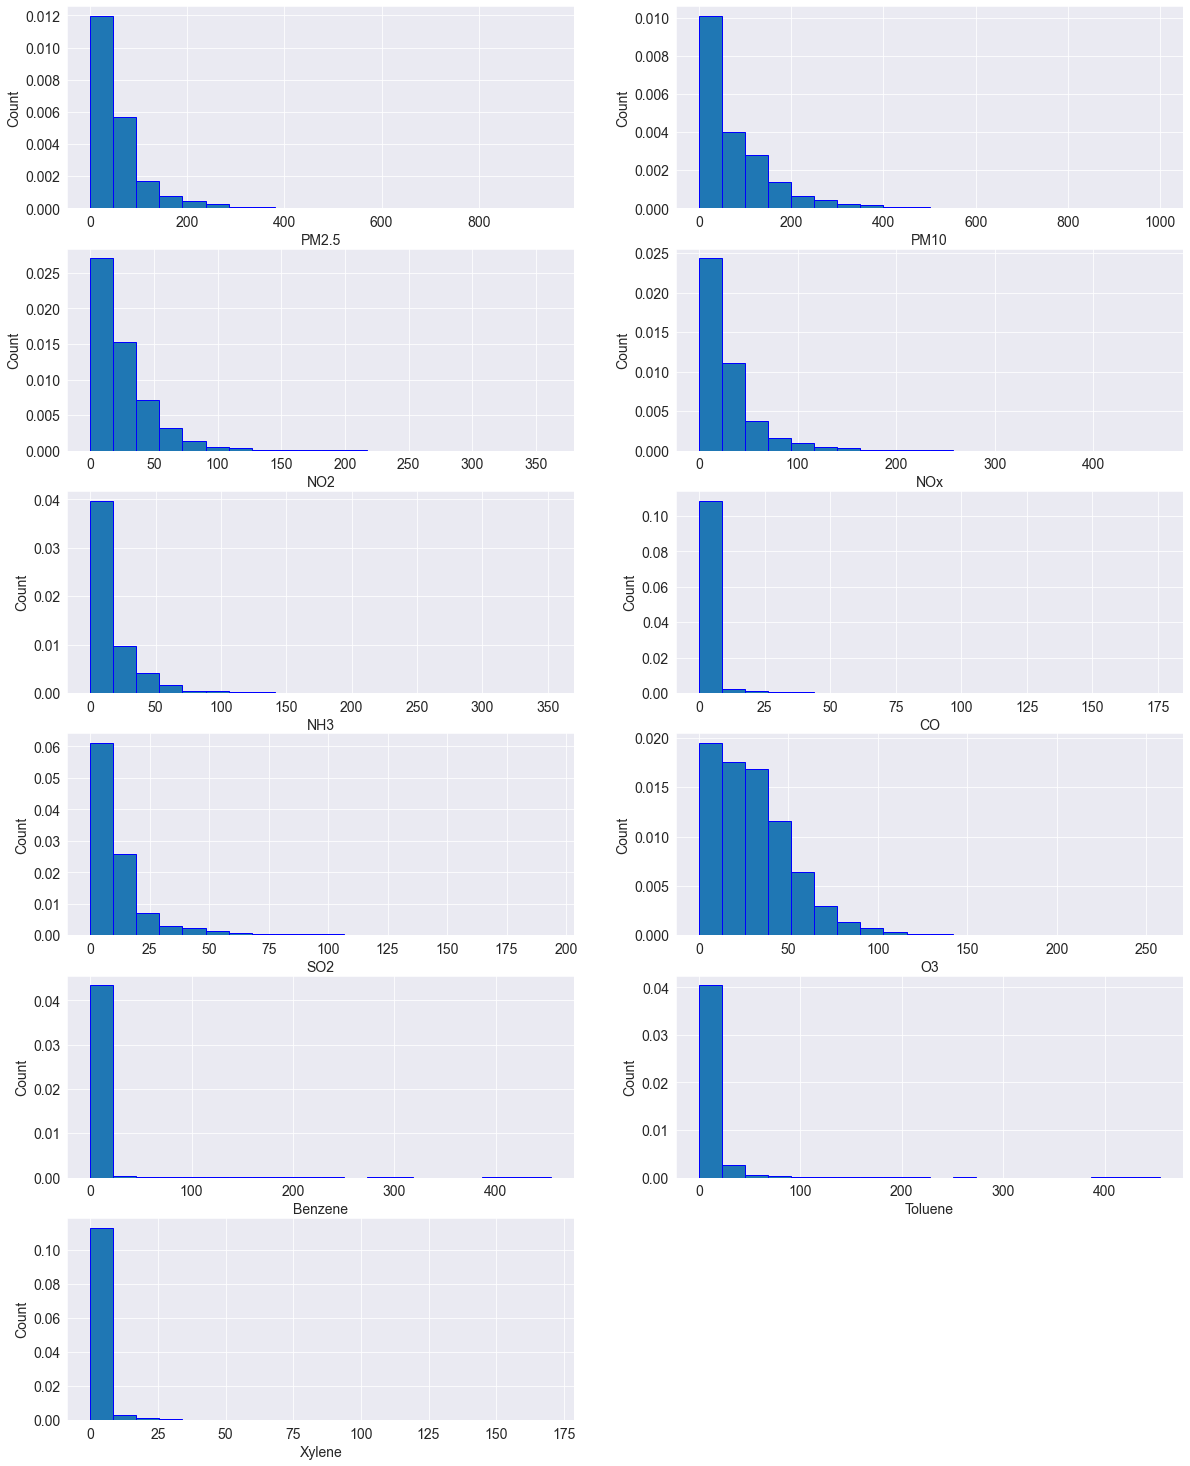

In [23]:
# Distribuiton of various gases and particulate in air

cols = ['PM2.5','PM10','NO2','NOx','NH3',
       'CO','SO2','O3','Benzene','Toluene','Xylene']

fig = plt.figure(figsize=(20, 26))

for i,col in enumerate(cols):
    fig.add_subplot(6, 2, i+1)
    plt.hist(city_day_not_null[col], bins=20, edgecolor='blue', density=True)
    plt.xlabel(col)
    plt.ylabel('Count')

**Vizualization 4** - Here we will see AQI Bucket status counts

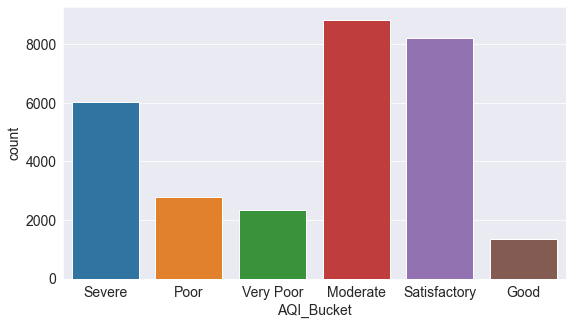

In [24]:
aqi = city_day['AQI_Bucket']
sns.countplot(x=aqi, data=city_day)
plt.show();

##### We can observe that the top 3 are: Moderate, Satisfactory & Severe. Very less number of Good. 

Let us save and upload our work to Jovian before continuing

In [86]:
import jovian

In [87]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashreveluv/zero-to-pandas-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/akashreveluv/zero-to-pandas-project


'https://jovian.ai/akashreveluv/zero-to-pandas-project'

## Asking and Answering Questions

**Trying to answer some questions regarding to dataset**



#### Q1: What are the skewness among pllutants and gases ?

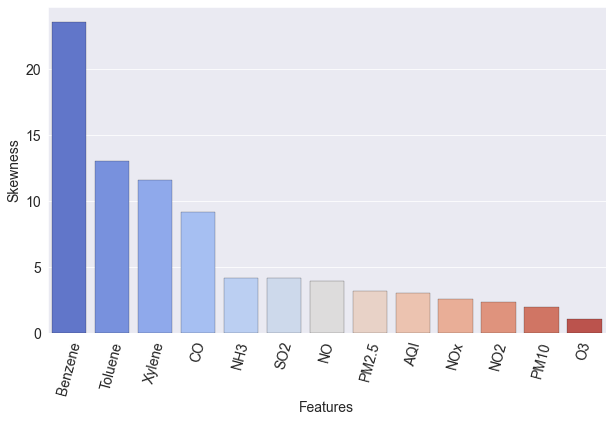

In [37]:
# Analyzing skewness in data, Let see...

skew = pd.DataFrame(city_day_not_null.skew().sort_values(ascending=False))
skew.columns = ['Skewness']

plt.figure(figsize=(10, 6))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='coolwarm')
plt.xlabel('Features');

##### We observed that, Benzene has most skewness

#### Q2: Which gases or pollutants have strong correlation ?

From above heatmap we observe a strong correlation of NO with NOx and of Benzene with Toluene. So lets visualize them with the help of scatterplots.

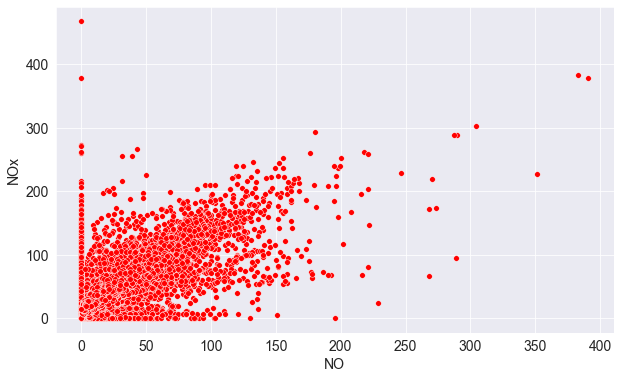

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO', y='NOx', data=city_day_not_null, s=32, color='red')
plt.show()

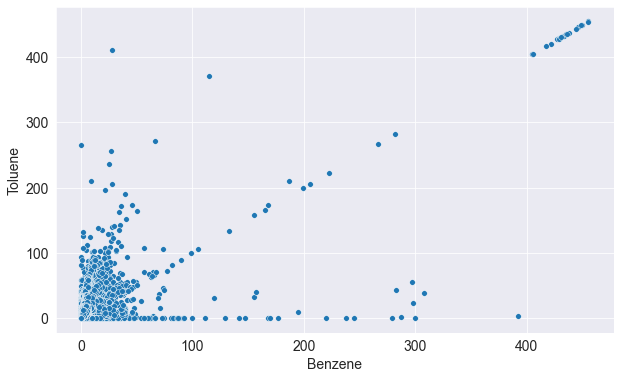

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Benzene',y='Toluene',data=city_day_not_null,s=32)
plt.show()

#### Q3: Which cities have good air quality ?

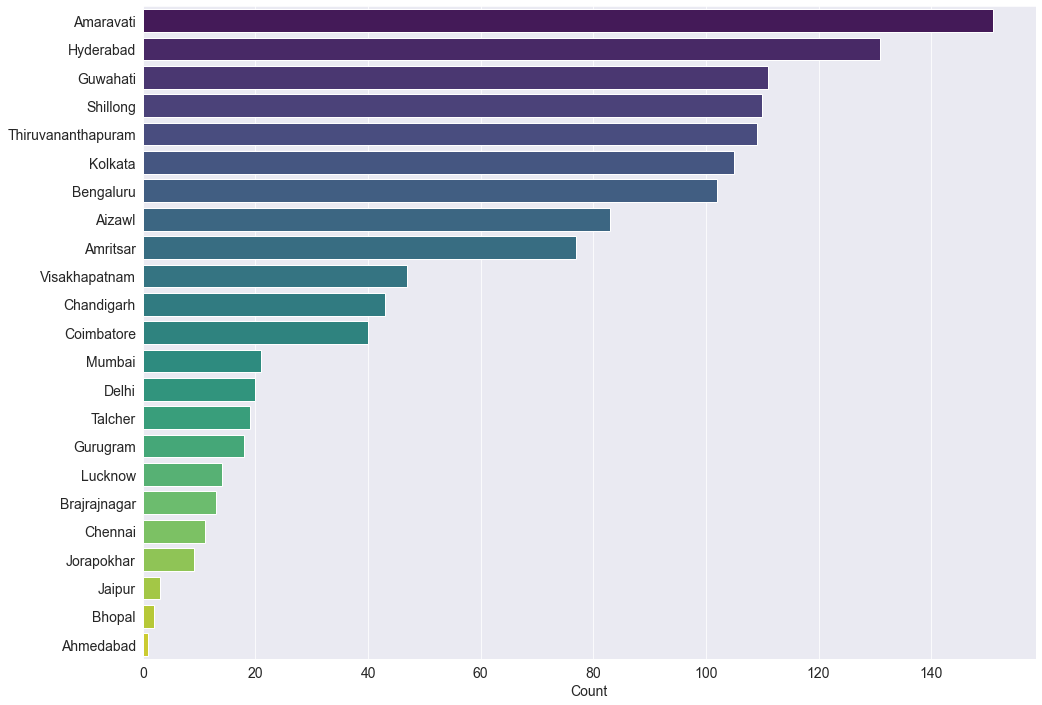

In [29]:
x = pd.DataFrame(city_day_df['City'][city_day_df['AQI'] < 50].value_counts().sort_values(ascending=False))
x = x.rename(columns={'City':'Count'})

plt.figure(figsize=(16, 12))
sns.barplot(x='Count', y=x.index, data=x, palette='viridis');

##### From above plot we infer that Amravati followed by Hyderabad have a higher count where their AQI is less than 50 .

#### Q4: Cities having worst level of each pollutants:

In [30]:
pollutants = ['City','AQI_Bucket', 'AQI', 'Particulate_Matter', 'Nitrogen Oxides','NH3', 'CO', 'SO2', 'O3',  'BTX']

In [31]:
# Function for calculate mean of each pollutants

def max_polluted_cities(pollutant):
    table = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    return table[:5].style.background_gradient(cmap='Reds')

print("Cities having worst levelss of each pollutant-")
for pollutant in pollutants[2:]:
    df = max_polluted_cities(pollutant)
    display(df)

Cities having worst levelss of each pollutant-


,City,AQI
0,Ahmedabad,300.215032
1,Delhi,258.196117
2,Lucknow,205.387257
3,Gurugram,194.821322
4,Patna,189.074812


,City,Particulate_Matter
0,Delhi,340.965709
1,Gurugram,190.766462
2,Talcher,182.884173
3,Guwahati,180.163466
4,Jaipur,175.845278


,City,Nitrogen Oxides
0,Kochi,153.690617
1,Delhi,148.248432
2,Kolkata,128.432789
3,Patna,102.666642
4,Ahmedabad,90.153365


,City,NH3
0,Chennai,48.860722
1,Delhi,41.809009
2,Chandigarh,29.764737
3,Brajrajnagar,27.824072
4,Jaipur,26.156490


,City,CO
0,Ahmedabad,15.465789
1,Lucknow,2.100637
2,Delhi,1.976053
3,Bengaluru,1.828566
4,Ernakulam,1.587654


,City,SO2
0,Ahmedabad,37.651747
1,Jorapokhar,23.542994
2,Talcher,22.580195
3,Patna,19.690544
4,Kochi,17.595988


,City,O3
0,Bhopal,57.987163
1,Delhi,49.177675
2,Jaipur,46.086445
3,Lucknow,36.421344
4,Amaravati,35.910757


,City,BTX
0,Shillong,68.759806
1,Ahmedabad,28.408278
2,Kolkata,27.474914
3,Delhi,21.608706
4,Aizawl,17.394248


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

**TODO** - In future, I will try more possibilities among columns and rows to visualize the answer.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()